In [52]:
#1a)
import pandas as pd
import seaborn as sns
target_names = ['Not Survived', 'Survived']
titanic_data = sns.load_dataset('titanic')
mean_age=titanic_data['age'].mean()
titanic_data['age'].fillna(mean_age, inplace=True)
titanic_data['deck']=titanic_data['deck'].astype(str)
titanic_data['deck']=titanic_data['deck'].replace('nan','Unknown')
rows_with_missing_data=titanic_data[titanic_data.isnull().any(axis=1)]
from sklearn.model_selection import train_test_split
y=titanic_data['survived'].astype('category')
X=titanic_data.drop('survived', axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [54]:
#1b)
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
X=titanic_data[['age','fare']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# Fit Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Fit LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Fit QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Compare accuracies
nb_accuracy = nb_model.score(X_test, y_test)
lda_accuracy = lda_model.score(X_test, y_test)
qda_accuracy = qda_model.score(X_test, y_test)

print("Naive Bayes accuracy: ", nb_accuracy)
print("LDA accuracy: ", lda_accuracy)
print("QDA accuracy: ", qda_accuracy)
from sklearn.metrics import classification_report

nb_predictions = nb_model.predict(X_test)
report = classification_report(y_test, nb_predictions, target_names=target_names)
print("Classification Report naive bayes model:\n", report)

lda_predictions = lda_model.predict(X_test)
report = classification_report(y_test, lda_predictions, target_names=target_names)
print("Classification Report lda model:\n", report)

qda_predictions = qda_model.predict(X_test)
report = classification_report(y_test, qda_predictions, target_names=target_names)
print("Classification Report qda model:\n", report)

Naive Bayes accuracy:  0.6815642458100558
LDA accuracy:  0.6759776536312849
QDA accuracy:  0.6871508379888268
Classification Report naive bayes model:
               precision    recall  f1-score   support

Not Survived       0.68      0.97      0.80       116
    Survived       0.71      0.16      0.26        63

    accuracy                           0.68       179
   macro avg       0.70      0.56      0.53       179
weighted avg       0.69      0.68      0.61       179

Classification Report lda model:
               precision    recall  f1-score   support

Not Survived       0.67      0.97      0.79       116
    Survived       0.69      0.14      0.24        63

    accuracy                           0.68       179
   macro avg       0.68      0.55      0.52       179
weighted avg       0.68      0.68      0.60       179

Classification Report qda model:
               precision    recall  f1-score   support

Not Survived       0.68      0.97      0.80       116
    Survived     

In [55]:
#1c)
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X["age"].min() - 0.5, X["age"].max() + 0.5
y_min, y_max = X["fare"].min() - 0.5, X["fare"].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 10))

# Make predictions on the meshgrid points for each model
nb_pred = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
lda_pred = lda_model.predict(np.c_[xx.ravel(), yy.ravel()])
qda_pred = qda_model.predict(np.c_[xx.ravel(), yy.ravel()])

nb_pred = nb_pred.reshape(xx.shape)
lda_pred = lda_pred.reshape(xx.shape)
qda_pred = qda_pred.reshape(xx.shape)

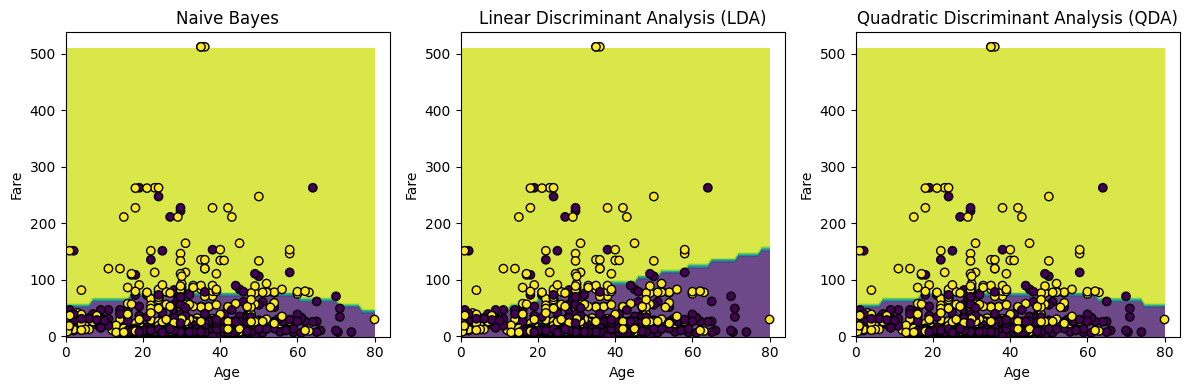

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.contourf(xx, yy, nb_pred, alpha=0.8)
plt.scatter(X["age"], X["fare"], c=y, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Naive Bayes')

plt.subplot(1, 3, 2)
plt.contourf(xx, yy, lda_pred, alpha=0.8)
plt.scatter(X["age"], X["fare"], c=y, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Linear Discriminant Analysis (LDA)')

plt.subplot(1, 3, 3)
plt.contourf(xx, yy, qda_pred, alpha=0.8)
plt.scatter(X["age"], X["fare"], c=y, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Quadratic Discriminant Analysis (QDA)')

plt.tight_layout()
plt.show()

In [58]:
#1d)
y=titanic_data['survived'].astype('category')
X=titanic_data.drop('survived', axis=1)
X['deck']=X['deck'].astype('category')
categorical_columns = X.select_dtypes(include=['object','category']).columns.tolist()
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))
X_encoded.columns = encoder.get_feature_names_out(categorical_columns)

# Concatenate the one-hot encoded features with the remaining features
X = pd.concat([X.drop(categorical_columns, axis=1), X_encoded], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
# Fit LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Fit QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

nb_predictions = nb_model.predict(X_test)
report = classification_report(y_test, nb_predictions, target_names=target_names)
print("Classification Report naive bayes model:\n", report)

lda_predictions = lda_model.predict(X_test)
report = classification_report(y_test, lda_predictions, target_names=target_names)
print("Classification Report lda model:\n", report)

qda_predictions = qda_model.predict(X_test)
report = classification_report(y_test, qda_predictions, target_names=target_names)
print("Classification Report qda model:\n", report)

Classification Report naive bayes model:
               precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00       114
    Survived       1.00      1.00      1.00        65

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Classification Report lda model:
               precision    recall  f1-score   support

Not Survived       0.86      0.87      0.86       114
    Survived       0.77      0.75      0.76        65

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

Classification Report qda model:
               precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00       114
    Survived       1.00      1.00      1.00        65

    accuracy                           1.00       179
   macro avg      

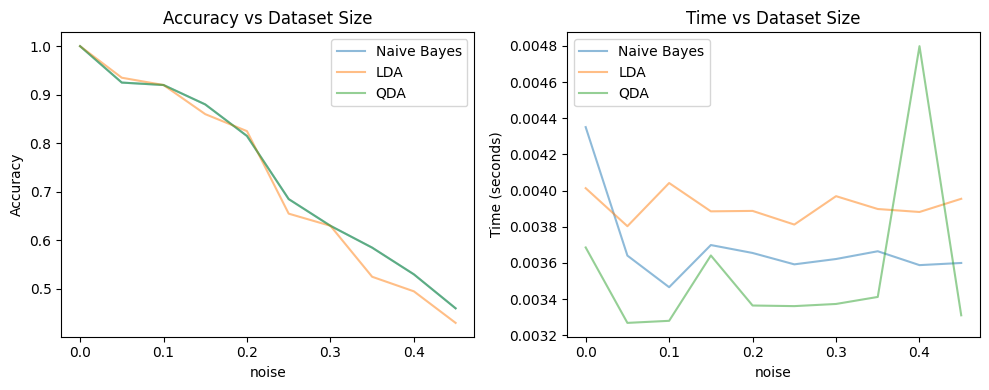

In [61]:
#2)
import time
import numpy as np
from sklearn.datasets import make_classification

# Set the random seed for reproducibility
np.random.seed(4400)

# Initialize lists to store accuracy and time results
accuracy_nb = []
accuracy_lda = []
accuracy_qda = []
time_nb = []
time_lda = []
time_qda = []
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
from sklearn.model_selection import train_test_split

def noise_maker(result, noise):
    num_labels_to_change = int(len(result) * noise)
    indices_to_change = np.random.choice(len(result), num_labels_to_change, replace=False)
    for i in indices_to_change:
      if result[i]==0:
        result[i]=1
      else:
        result[i]=0
    return result
noisepect = np.arange(0, 0.5, 0.05)
for noise in noisepect:

    # Generate a random classification dataset
    X1 = np.random.normal(5, 1, 1000)
    # X2 = cor * X1 + np.random.normal(0, 1, 1000)
    # X3 = cor * X1 + np.random.normal(0, 1, 1000)
    # X4 = 2* cor * X2 + np.random.normal(0, 1, 1000)
    X = pd.DataFrame({'X1': X1})
    y = result_vector = np.where(X1 > 5, 'group1', 'group2')
    y=noise_maker(y,noise)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)

    # Fit Naive Bayes model and calculate accuracy and time
    start_time = time.time()
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    accuracy_nb.append(nb_model.score(X_test, y_test))
    time_nb.append(time.time() - start_time)

    # Fit LDA model and calculate accuracy and time
    start_time = time.time()
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_train, y_train)
    accuracy_lda.append(lda_model.score(X_test, y_test))
    time_lda.append(time.time() - start_time)

    start_time = time.time()
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(X_train, y_train)
    accuracy_qda.append(qda_model.score(X_test, y_test))
    time_qda.append(time.time() - start_time)

# Plot the accuracy results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(noisepect, accuracy_nb, label='Naive Bayes', alpha=0.5)
plt.plot(noisepect, accuracy_lda, label='LDA', alpha=0.5)
plt.plot(noisepect, accuracy_qda, label='QDA', alpha=0.5)
plt.xlabel('noise')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Dataset Size')
plt.legend()

# Plot the time results
plt.subplot(1, 2, 2)
plt.plot(noisepect, time_nb, label='Naive Bayes', alpha=0.5)
plt.plot(noisepect, time_lda, label='LDA', alpha=0.5)
plt.plot(noisepect, time_qda, label='QDA', alpha=0.5)
plt.xlabel('noise')
plt.ylabel('Time (seconds)')
plt.title('Time vs Dataset Size')
plt.legend()

plt.tight_layout()
plt.show()

In [62]:
accuracy_qda

[1.0, 0.925, 0.92, 0.88, 0.815, 0.685, 0.63, 0.585, 0.53, 0.46]

In [63]:
accuracy_lda

[1.0, 0.935, 0.92, 0.86, 0.825, 0.655, 0.63, 0.525, 0.495, 0.43]

In [64]:
accuracy_nb

[1.0, 0.925, 0.92, 0.88, 0.815, 0.685, 0.63, 0.585, 0.53, 0.46]